<a href="https://colab.research.google.com/github/VENKATRAJU153/DEEP_LEARNING_IRIS_MULTILABEL/blob/main/IRISMUTILABELANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [67]:
df = pd.read_csv('/content/Iris.csv')
df = df.drop(['Id'],axis=1)
df['Species'] = df['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}).astype(int)
X = df.iloc[: , :-1] # independent
y = df.iloc[: , -1] # dependent
df.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
134,6.1,2.6,5.6,1.4,2
63,6.1,2.9,4.7,1.4,1
24,4.8,3.4,1.9,0.2,0
143,6.8,3.2,5.9,2.3,2
11,4.8,3.4,1.6,0.2,0
103,6.3,2.9,5.6,1.8,2
76,6.8,2.8,4.8,1.4,1
74,6.4,2.9,4.3,1.3,1
53,5.5,2.3,4.0,1.3,1
81,5.5,2.4,3.7,1.0,1


In [68]:
X.shape

(150, 4)

In [69]:
y.shape

(150,)

In [70]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [71]:
train_ind = X.iloc[ : 130 , :]
val_ind = X.iloc[130 : 145 , :]
test_ind = X.iloc[145 : 150 , :]

train_dep = y.iloc[ : 130]
val_dep = y.iloc[130 : 145]
test_dep = y.iloc[145 : 150]

In [72]:
train_ind.shape , train_dep.shape

((130, 4), (130,))

In [73]:
val_ind.shape , val_dep.shape

((15, 4), (15,))

In [74]:
test_ind.shape , test_dep.shape

((5, 4), (5,))

In [75]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.activations import relu,sigmoid,softmax

In [76]:
train_ind.shape[1]

4

In [77]:
import warnings
warnings.filterwarnings('ignore')

In [78]:
model = Sequential() # class -> object

model.add(Dense(units=128,kernel_initializer='he_uniform',
                activation='relu',input_dim = train_ind.shape[1])) # 4 inputs to Hidden layer 1

model.add(Dense(units=64,kernel_initializer='he_uniform',activation='relu')) # Hidden Layer 2

model.add(Dense(units=32,kernel_initializer='he_uniform',activation='relu')) # Hidden Layer 3

model.add(Dense(units=8,kernel_initializer='he_uniform',activation='relu')) # Hidden Layer 4

model.add(Dense(units=4,kernel_initializer='he_uniform',activation='relu')) # Hidden Layer 5

model.add(Dense(units=2,kernel_initializer='he_uniform',activation='relu')) # Hidden Layer 6

model.add(Dense(units=3,kernel_initializer='glorot_uniform',activation='softmax')) # output layer

In [79]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 3)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,295 (44.12 KB)

 Trainable params: 11,295 (44.12 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['Accuracy'])


In [81]:
train_dep.ndim

1

In [82]:
from tensorflow.keras.utils import to_categorical
train_dep_proper = to_categorical(train_dep)
val_dep_proper = to_categorical(val_dep)


In [83]:
model.fit(train_ind,train_dep_proper,batch_size=20,
          epochs=50,
          validation_data=(val_ind,val_dep_proper))

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - Accuracy: 0.3227 - loss: 1.1059 - val_Accuracy: 0.0000e+00 - val_loss: 1.1055
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - Accuracy: 0.4040 - loss: 1.0971 - val_Accuracy: 0.0000e+00 - val_loss: 1.1118
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - Accuracy: 0.3729 - loss: 1.0966 - val_Accuracy: 0.0000e+00 - val_loss: 1.1176
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - Accuracy: 0.4139 - loss: 1.0960 - val_Accuracy: 0.0000e+00 - val_loss: 1.1236
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - Accuracy: 0.3680 - loss: 1.0945 - val_Accuracy: 0.0000e+00 - val_loss: 1.1292
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - Accuracy: 0.4365 - loss: 1.0925 - val_Accuracy: 0.0000e+00 - val_loss: 1.1344
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - Accuracy: 0.3972 - loss: 1.0941 - val_Accuracy: 0.0000e+00 - val_loss: 1.1393
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - Accuracy: 0.3525 - loss: 1.0934 - val_Accuracy

In [84]:
model.history.history.keys()

dict_keys(['Accuracy', 'loss', 'val_Accuracy', 'val_loss'])

In [85]:
model.history.history['val_loss']

[1.1055408716201782,
 1.111836552619934,
 1.1175681352615356,
 1.1236168146133423,
 1.1291841268539429,
 1.1343610286712646,
 1.1392720937728882,
 1.1440234184265137,
 1.1488398313522339,
 1.1538734436035156,
 1.1595003604888916,
 1.1647799015045166,
 1.1699903011322021,
 1.174834966659546,
 1.1796603202819824,
 1.1840405464172363,
 1.1892319917678833,
 1.1938109397888184,
 1.1980112791061401,
 1.202812671661377,
 1.2076456546783447,
 1.2121021747589111,
 1.2162699699401855,
 1.2206690311431885,
 1.2247549295425415,
 1.2299364805221558,
 1.2342867851257324,
 1.2377492189407349,
 1.2411234378814697,
 1.2449733018875122,
 1.2480565309524536,
 1.2525830268859863,
 1.2564594745635986,
 1.2607696056365967,
 1.2645301818847656,
 1.2681294679641724,
 1.2717843055725098,
 1.275613784790039,
 1.2788752317428589,
 1.2823649644851685,
 1.2856268882751465,
 1.2880370616912842,
 1.2908450365066528,
 1.293163776397705,
 1.2957127094268799,
 1.297858476638794,
 1.3009060621261597,
 1.3038302659988403

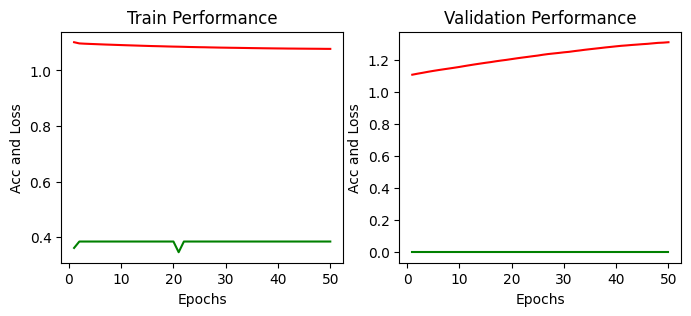

In [86]:
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
plt.title('Train Performance')
plt.xlabel('Epochs')
plt.ylabel('Acc and Loss')
plt.plot(np.arange(1,51),model.history.history['Accuracy'],color='g',label='Train ACC')
plt.plot(np.arange(1,51),model.history.history['loss'],color='r',label='Train loss')


plt.subplot(1,2,2)
plt.title('Validation Performance')
plt.xlabel('Epochs')
plt.ylabel('Acc and Loss')
plt.plot(np.arange(1,51),model.history.history['val_Accuracy'],color='g',label='val ACC')
plt.plot(np.arange(1,51),model.history.history['val_loss'],color='r',label='val loss')

plt.show()

In [87]:
test_ind

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [88]:
test_dep

,Species
145,2
146,2
147,2
148,2
149,2


In [89]:
labels = ['setosa','versicolor','verginica']

In [90]:
a = np.array([6.7,3.0,5.2,2.3]).reshape(1,-1)
r = model.predict([a])
r

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


array([[0.36581936, 0.36378455, 0.2703961 ]], dtype=float32)

In [91]:
np.max(r)

np.float32(0.36581936)

In [92]:
labels[np.argmax(r)]

'setosa'

In [93]:
t = []
results = model.predict(test_ind)
for i in results:
  if np.argmax(i) == 0:
    print(f'Setosa')
    t.append(0)
  elif np.argmax(i) == 1:
    print(f'Versicolor')
    t.append(1)
  else:
    print(f'Verginica')
    t.append(2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Setosa
Setosa
Setosa
Setosa
Setosa
